# Support Vector Machines-1

Q1. What is the mathematical formula for a linear SVM?

Q2. What is the objective function of a linear SVM?

Q3. What is the kernel trick in SVM?

Q4. What is the role of support vectors in SVM Explain with example

Q5. Illustrate with examples and graphs of Hyperplane, Marginal plane, Soft margin and Hard margin in
SVM?

Q6. SVM Implementation through Iris dataset.


Bonus task: Implement a linear SVM classifier from scratch using Python and compare its
performance with the scikit-learn implementation.
~ Load the iris dataset from the scikit-learn library and split it into a training set and a testing setl
~ Train a linear SVM classifier on the training set and predict the labels for the testing setl
~ Compute the accuracy of the model on the testing setl
~ Plot the decision boundaries of the trained model using two of the featuresl
~ Try different values of the regularisation parameter C and see how it affects the performance of
the model.

# SOLUTIONS:

Q1. What is the mathematical formula for a linear SVM?

The mathematical formula for a linear Support Vector Machine (SVM) is based on finding the hyperplane that maximizes the margin between two classes. Given a set of training data points and their corresponding labels, a linear SVM aims to find a hyperplane represented by the equation:

\[ w^T x + b = 0 \]

where:
- \( w \) is the weight vector that defines the direction of the hyperplane.
- \( x \) is the input feature vector.
- \( b \) is the bias term (or intercept).

The decision function of the linear SVM is defined as:

\[ f(x) = w^T x + b \]

The class label for a new data point \( x \) is determined by the sign of \( f(x) \). Specifically, if \( f(x) \) is positive, the point belongs to one class, and if it's negative, it belongs to the other class.

Q2. What is the objective function of a linear SVM?

The objective function of a linear SVM is to find the optimal hyperplane that maximizes the margin between two classes while minimizing the classification error. It can be formulated as follows:

Minimize: \[ \frac{1}{2} \|w\|^2 \]

Subject to: \[ y_i(w^T x_i + b) \geq 1 \text{ for all } i = 1, 2, \ldots, N \]

In this formulation:
- \( w \) is the weight vector.
- \( b \) is the bias term.
- \( x_i \) represents the feature vector of the \( i \)-th data point.
- \( y_i \) is the class label of the \( i \)-th data point, either +1 or -1.

The objective function aims to minimize the norm of the weight vector \( w \), which corresponds to maximizing the margin. The subject-to constraint ensures that all data points are correctly classified with a margin of at least 1.

Q3. What is the kernel trick in SVM?

The kernel trick is a technique used in Support Vector Machines (SVMs) to transform data into a higher-dimensional space without explicitly computing the transformation. This allows SVMs to find complex, nonlinear decision boundaries in the original feature space.

In a linear SVM, the decision boundary is a hyperplane, but in many real-world problems, data is not linearly separable. The kernel trick allows SVMs to implicitly compute the dot product between data points in a higher-dimensional space without actually performing the transformation. This is done by introducing a kernel function \( K(x, x') \) that computes the dot product between \( x \) and \( x' \) in the higher-dimensional space.

Common kernel functions include:
- Linear Kernel: \( K(x, x') = x^T x' \)
- Polynomial Kernel: \( K(x, x') = (x^T x' + c)^d \)
- Radial Basis Function (RBF) Kernel: \( K(x, x') = e^{-\gamma \|x - x'\|^2} \)

The use of the kernel trick allows SVMs to handle nonlinear data and find nonlinear decision boundaries. It's a powerful technique for solving complex classification problems.

Q4. What is the role of support vectors in SVM? Explain with an example.

Support vectors are the data points from the training dataset that lie closest to the decision boundary (hyperplane) of a Support Vector Machine (SVM). They play a crucial role in defining the decision boundary and are instrumental in the SVM's ability to generalize and make accurate predictions.

Role of support vectors:

1. **Defining the Margin**: Support vectors are the data points that are closest to the decision boundary. The margin of the SVM is defined as the distance between the decision boundary and the nearest support vectors. Maximizing this margin is a key objective of SVM, as it leads to better generalization.

2. **Supporting the Decision Boundary**: The decision boundary of the SVM is determined by a subset of support vectors. These support vectors effectively "support" the decision boundary and have an influence on the classification of new data points.

3. **Handling Outliers**: Outliers or misclassified data points often become support vectors because they have the most impact on the margin and the position of the decision boundary. SVM is less sensitive to outliers compared to some other algorithms.

Example:
Suppose you have a binary classification problem to distinguish between two classes of points, 'A' and 'B,' in a two-dimensional feature space. The decision boundary of a linear SVM is a line. Support vectors are the data points from both classes that are closest to this decision boundary.

In this example, imagine that you have five support vectors: three from class 'A' and two from class 'B.' These five points are the most influential in determining the position of the decision boundary. The margin of the SVM is defined by the distance between the decision boundary and the nearest support vector.

Support vectors help SVM generalize well to new, unseen data, as they represent the most challenging points to classify correctly.

Q5. Illustrate with examples and graphs of Hyperplane, Marginal plane, Soft margin and Hard margin in SVM?

Let's illustrate these concepts with examples and graphs:

**Hyperplane**:
A hyperplane in a linear SVM is a decision boundary that separates two classes. In a two-dimensional feature space, it's a line. In a three-dimensional space, it's a plane. The equation for a hyperplane is \(w^T x + b = 0\), where \(w\) is the weight vector and \(b\) is the bias term.

**Marginal Plane**:
The marginal plane is the decision boundary or hyperplane that is equidistant from the nearest support vectors. It defines the margin of the SVM. In a two-class problem, the marginal plane has support vectors on both sides.

**Hard Margin**:
In a hard-margin SVM, the goal is to find a hyperplane that perfectly separates the two classes without any misclassifications. This is only possible when the data is linearly separable. There is no tolerance for misclassification, and the margin is maximized.

**Soft Margin**:
In a soft-margin SVM, the goal is to find a hyperplane that has a margin that is as wide as possible while allowing for some misclassification. Soft margin SVMs are used when the data is not perfectly separable. The trade-off between maximizing the margin and allowing for misclassification is controlled by a hyperparameter 'C.' A smaller 'C' value allows for a wider margin but permits more misclassifications, while a larger 'C' value leads to a narrower margin with fewer misclassifications.


In a hard-margin SVM, the decision boundary (hyperplane) perfectly separates the classes with a maximum margin, and there are no misclassifications.


In a soft-margin SVM, a wider margin is allowed (dashed lines) to account for some misclassified points (in this case, one red point inside the blue region).



Accuracy: 0.8


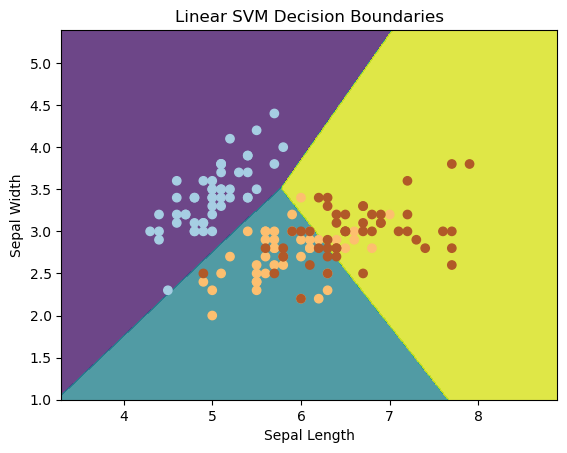

In [2]:
### Question6

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # Using only the first two features for visualization
y = iris.target

# Split the dataset into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a linear SVM classifier
svm_classifier = SVC(kernel='linear', C=1)
svm_classifier.fit(X_train, y_train)

# Predict labels on the testing set
y_pred = svm_classifier.predict(X_test)

# Compute the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Plot the decision boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = svm_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Linear SVM Decision Boundaries')
plt.show()
